### Membagi data train dan data testing

In [1]:
import splitfolders

# Menentukan folder awal dari dataset citra
base_dir = './Dataset/Original_Dataset'

# Melakukan split data berdasarkan ukuran 80% dan 20%
splitfolders.ratio(base_dir, output='./Dataset', seed=1337, ratio=(.8, .2))

Copying files: 5080 files [00:32, 154.38 files/s]


### Menentukan preproses dan scaling data

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Menentukan scalling dan perubahan setiap data train
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap'
                )

# Menentukan scalling dan perubahan setiap data test
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap'
                )

### Menerapkan citra dengan auto labeling berdasarkan nama folder

In [3]:
train_dir = './Dataset/train'
validation_dir = './Dataset/val'

train_generator = train_datagen.flow_from_directory(
        train_dir,  # Direktori data latih
        target_size=(150, 150),  # Mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical')

Found 4063 images belonging to 3 classes.
Found 1017 images belonging to 3 classes.


### Membuat Model CNN

In [4]:
import tensorflow as tf

# Conv2D --> Untuk mengaplikasikan filter pada citra
# MaxPooling2D --> Mengurangi resolusi gambar namun tetap ada informasi di gambar
# input_shape --> Sesuai dengan shape dari citra yang telah diubah dan diratakan sebelumnya

modelCNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2 ),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Convert citra ke 1 dimensi
    tf.keras.layers.Flatten(),
    
    # Hidden layer
    # Terdapat 128 neuron di dalam 1 layer
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer dengan 3 output values
    # Disini 3 karena output kita (batu, gunting, kertas) --> softmax karena lebih dari 2 class
    tf.keras.layers.Dense(3, activation='softmax') 
])

### Compile Model

In [5]:
# categorical_crossentropy --> Digunakan untuk citra yang lebih dari 3 class
# tf.optimizers.Adam() --> Cocok untuk citra dengan data yang cukup banyak

modelCNN.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

### Latih Model CNN

In [6]:
history = modelCNN.fit(
        train_generator,
        steps_per_epoch=25,  # Batch yang akan dieksekusi pada setiap epoch
        epochs=25,
        validation_data=validation_generator, # Menampilkan akurasi pengujian data validasi
        validation_steps=5,  # Batch yang akan dieksekusi pada setiap epoch
        verbose=1 # Animasi perjalanan epoch
      )

Epoch 1/25
25/25 [==============================] - 30s 1s/step - loss: 1.1229 - accuracy: 0.3288 - val_loss: 1.0993 - val_accuracy: 0.3063
Epoch 2/25
25/25 [==============================] - 31s 1s/step - loss: 1.0613 - accuracy: 0.4187 - val_loss: 0.8871 - val_accuracy: 0.5875
Epoch 3/25
25/25 [==============================] - 35s 1s/step - loss: 0.7993 - accuracy: 0.6288 - val_loss: 0.6597 - val_accuracy: 0.7437
Epoch 4/25
25/25 [==============================] - 36s 1s/step - loss: 0.5466 - accuracy: 0.7650 - val_loss: 0.5878 - val_accuracy: 0.7688
Epoch 5/25
25/25 [==============================] - 32s 1s/step - loss: 0.4813 - accuracy: 0.8275 - val_loss: 0.4297 - val_accuracy: 0.8438
Epoch 6/25
25/25 [==============================] - 23s 917ms/step - loss: 0.3344 - accuracy: 0.8800 - val_loss: 0.2766 - val_accuracy: 0.9187
Epoch 7/25
25/25 [==============================] - 24s 959ms/step - loss: 0.2530 - accuracy: 0.9225 - val_loss: 0.1408 - val_accuracy: 0.9688
Epoch 8/25
25/

KeyboardInterrupt: 

### Model Summary

In [ ]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

### Evaluate Model

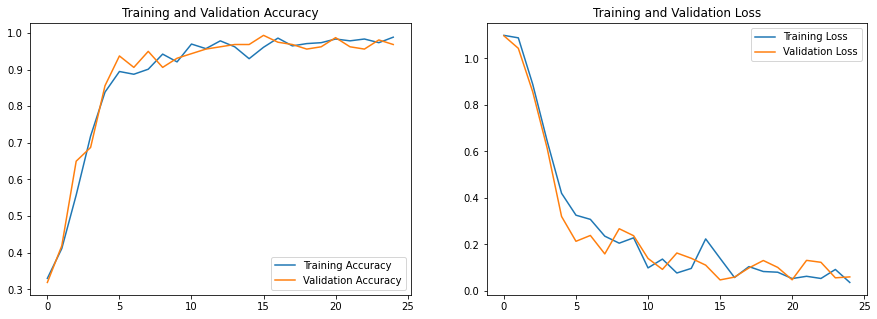

In [ ]:
import matplotlib.pyplot as plt

# Akurasi
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Loss
loss = history.history['loss']
validation_loss = history.history['val_loss']

# Jumlah epoch
epochs_range = range(len(history.history['accuracy']))

# Plotting metrics
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

### Testing Model

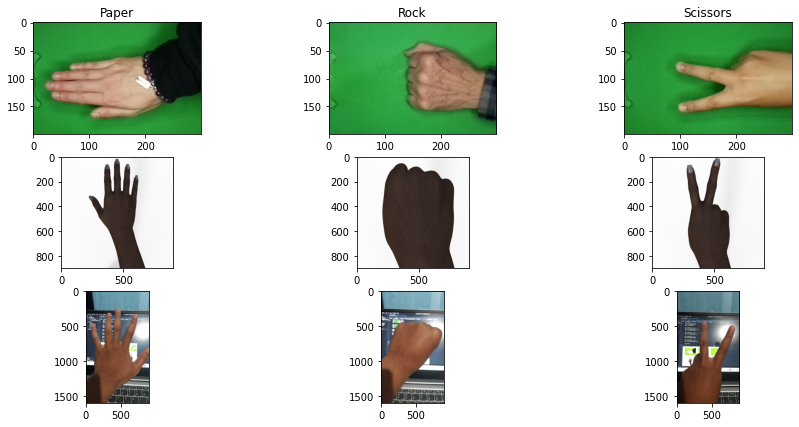

In [ ]:
import matplotlib.pyplot as plt

# Backgroung hijau
img_paper_1 = plt.imread('./Dataset/Testing_Model/1fKclJk4eBWOQSR1.png')
img_rock_1 = plt.imread('./Dataset/Testing_Model/1mnAKQCHEDbtjPX2.png')
img_scissors_1 = plt.imread('./Dataset/Testing_Model/1L1n6plr7jlZGirw.png')

# Backgroung putih
img_paper_2 = plt.imread('./Dataset/Testing_Model/paper-hires1.png')
img_rock_2 = plt.imread('./Dataset/Testing_Model/rock-hires1.png')
img_scissors_2 = plt.imread('./Dataset/Testing_Model/scissors-hires1.png')

# Tangan sendiri
img_paper_3 = plt.imread('./Dataset/Testing_Model/paper-sendiri.jpeg')
img_rock_3 = plt.imread('./Dataset/Testing_Model/rock-sendiri.jpeg')
img_scissors_3 = plt.imread('./Dataset/Testing_Model/scissors-sendiri.jpeg')

plt.figure(figsize=(15, 7))

plt.subplot(3, 3, 1)
plt.imshow(img_paper_1)
plt.title('Paper')

plt.subplot(3, 3, 2)
plt.imshow(img_rock_1)
plt.title('Rock')

plt.subplot(3, 3, 3)
plt.imshow(img_scissors_1)
plt.title('Scissors')

plt.subplot(3, 3, 4)
plt.imshow(img_paper_2)

plt.subplot(3, 3, 5)
plt.imshow(img_rock_2)

plt.subplot(3, 3, 6)
plt.imshow(img_scissors_2)

plt.subplot(3, 3, 7)
plt.imshow(img_paper_3)

plt.subplot(3, 3, 8)
plt.imshow(img_rock_3)

plt.subplot(3, 3, 9)
plt.imshow(img_scissors_3)

plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def convertImage(img) :
    gambar = image.load_img(img, target_size=(150, 150))
    gambar_array = image.img_to_array(gambar)
    gambar_batch = np.expand_dims(gambar_array, axis=0)
    gambar_preproses = np.vstack([gambar_batch])

    return gambar_preproses

In [ ]:
# Backgroung hijau
img_paper_1 = './Dataset/Testing_Model/1fKclJk4eBWOQSR1.png'
img_rock_1 = './Dataset/Testing_Model/1mnAKQCHEDbtjPX2.png'
img_scissors_1 = './Dataset/Testing_Model/1L1n6plr7jlZGirw.png'

# Backgroung putih
img_paper_2 = './Dataset/Testing_Model/paper-hires1.png'
img_rock_2 = './Dataset/Testing_Model/rock-hires1.png'
img_scissors_2 = './Dataset/Testing_Model/scissors-hires1.png'

# Tangan sendiri
img_paper_3 = './Dataset/Testing_Model/paper-sendiri.jpeg'
img_rock_3 = './Dataset/Testing_Model/rock-sendiri.jpeg'
img_scissors_3 = './Dataset/Testing_Model/scissors-sendiri.jpeg'

prediction = modelCNN.predict(convertImage(img_scissors_2), batch_size=10)
output_class = np.argmax(prediction)

if output_class == 0:
    print('Paper')
elif output_class == 1:
    print('Rock')
else:
    print('Scissors')

Scissors
